**1.Importing libraries**

In [ ]:
TRAIN_PATH = "/content/drive/MyDrive/covid 19/Train"
VAL_PATH = "/content/drive/MyDrive/covid 19/Val"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

**2. Buiding the CNN Architecture**

In [ ]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                   

**3. Data Augmentation, Normalizing Data & Training the Model**

In [ ]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 224 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    VAL_PATH,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [ ]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=7,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)


<ipython-input-10-e59c1f494e68>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/10
7/7 [==============================] - 166s 23s/step - loss: 2.4937 - accuracy: 0.5089 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 78s 11s/step - loss: 0.6539 - accuracy: 0.5938 - val_loss: 0.6396 - val_accuracy: 0.6667
Epoch 3/10
7/7 [==============================] - 76s 11s/step - loss: 0.5534 - accuracy: 0.7143 - val_loss: 0.4569 - val_accuracy: 0.9333
Epoch 4/10
7/7 [==============================] - 79s 11s/step - loss: 0.3799 - accuracy: 0.8393 - val_loss: 0.3217 - val_accuracy: 0.9000
Epoch 5/10
7/7 [==============================] - 75s 11s/step - loss: 0.3583 - accuracy: 0.8393 - val_loss: 0.2668 - val_accuracy: 0.9500
Epoch 6/10
7/7 [==============================] - 77s 11s/step - loss: 0.2936 - accuracy: 0.9107 - val_loss: 0.1608 - val_accuracy: 0.9667
Epoch 7/10
7/7 [==============================] - 75s 11s/step - loss: 0.2045 - accuracy: 0.9196 - val_loss: 0.1517 - val_accuracy: 0.9167
Epoch 8/10
7/7 [==========

In [ ]:
model.save("model_adv.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.evaluate_generator(train_generator)

<ipython-input-12-e4ade065aa26>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(train_generator)


[0.10870859771966934, 0.9598214030265808]

In [ ]:
model.evaluate_generator(validation_generator)

<ipython-input-13-8951cfd684a1>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(validation_generator)


[0.08343850076198578, 0.9833333492279053]

**4.Model Evaluation**


In [ ]:
model = load_model('model_adv.h5')

In [ ]:
import os


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
y_actual = []
y_test = []

In [ ]:
from PIL import Image
for i in os.listdir("/content/drive/MyDrive/covid 19/Val/Normal/"):
  img = image.load_img("/content/drive/MyDrive/covid 19/Val/Normal/"+i, target_size = (224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict(img)
  y_test.append(p[0,0])
  y_actual.append(1)

1/1 [==============================] - 0s 80ms/step


In [ ]:
for i in os.listdir("/content/drive/MyDrive/covid 19/Val/Covid/"):
  img = image.load_img("/content/drive/MyDrive/covid 19/Val/Covid/"+i, target_size = (224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict(img)
  y_test.append(p[0,0])
  y_actual.append(0)

1/1 [==============================] - 0s 126ms/step


**5. Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Check the values in y_actual and y_test
print(f"y_actual: {y_actual}")
print(f"y_test: {y_test}")

# Ensure that the values in y_actual and y_test are consistent
y_actual = y_actual.astype(int)
y_test = y_test.astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(y_actual, y_test)

# Print the confusion matrix
print(cm)

y_actual: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
y_test: [1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
 1.0000000e+00 0.0000000e+00 0.0000000e+00 9.9906445e-01 2.1604699e-28
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
[[27  

<Axes: >

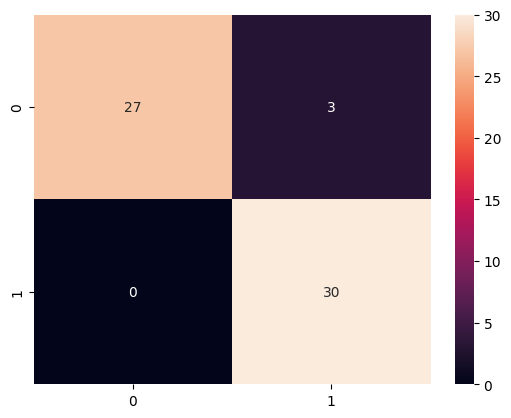

In [ ]:
import seaborn as sns
sns.heatmap(cm,cmap=None,annot=True)

**6.Traning and Validation Loss**

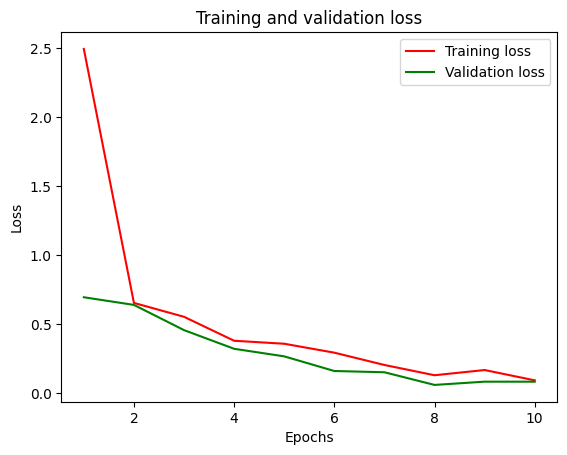

In [ ]:
import matplotlib.pyplot as plt
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**6. Traning and Validation accuracy**

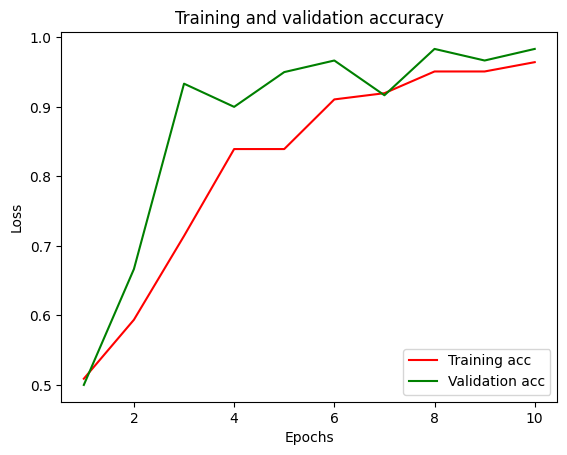

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**7. Some comparative result of Radiologist Vs CNN Valaidation**

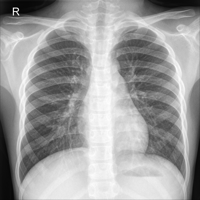

1/1 [==============================] - 0s 209ms/step
Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


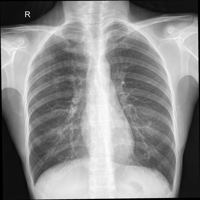

1/1 [==============================] - 0s 193ms/step
Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


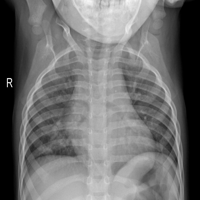

1/1 [==============================] - 0s 109ms/step
Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


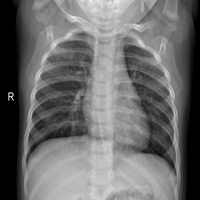

1/1 [==============================] - 0s 136ms/step
Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


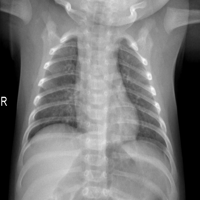

1/1 [==============================] - 0s 152ms/step
Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


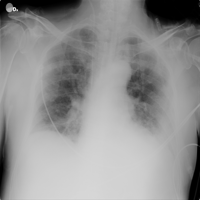

1/1 [==============================] - 0s 78ms/step
Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


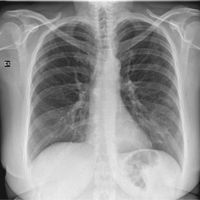

1/1 [==============================] - 0s 76ms/step
Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


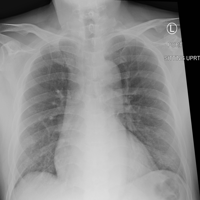

1/1 [==============================] - 0s 82ms/step
Radiologist: COVID-19 +ve
Radiologist: COVID-19 -ve


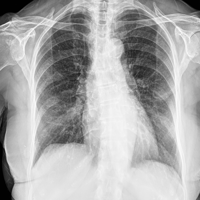

1/1 [==============================] - 0s 78ms/step
Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


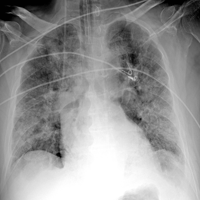

1/1 [==============================] - 0s 82ms/step
Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


In [ ]:
class color:
   GREEN = '\033[92m'
   RED = '\033[91m'

from PIL import Image
j = 0
for i in os.listdir("/content/drive/MyDrive/covid 19/Val/Normal/"):
  j = j+1
  pil_img = Image.open('/content/drive/MyDrive/covid 19/Val/Normal/'+i)
  im = pil_img
  size = (200,200) #image size

  #resize image
  out = im.resize(size)
  display(out)
  img = image.load_img("/content/drive/MyDrive/covid 19/Val/Normal/"+i, target_size = (224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict(img)
  print(color.GREEN + 'Radiologist: COVID-19 -ve' + color.GREEN)

  if p==0:
    print(color.RED + 'CNN Model: COVID-19 +ve' + color.RED)
  else:
    print("CNN Model: COVID-19 -ve")
  if (j==5):
    break

from PIL import Image
j = 0
for i in os.listdir("/content/drive/MyDrive/covid 19/Val/Covid/"):
  j = j+1
  pil_img = Image.open('/content/drive/MyDrive/covid 19/Val/Covid/'+i)
  im = pil_img
  size = (200,200) #image size

  #resize image
  out = im.resize(size)
  display(out)
  img = image.load_img("/content/drive/MyDrive/covid 19/Val/Covid/"+i, target_size = (224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict(img)
  print(color.RED + 'Radiologist: COVID-19 +ve' + color.RED)
  if p==0:
    print("CNN Model: COVID-19 +ve")
  else:
    print(color.GREEN + 'Radiologist: COVID-19 -ve' + color.GREEN)
  if (j==5):
    break